# SLU06 - Dealing with Data Problems

This notebook has exercises covering the following topics:

- Tidy Data
- Data Entry Problems
- Missing Values

In [1]:
import math
import os
import pandas as pd
import numpy as np
import hashlib
import json

The dataset that we'll use for these exercises comes from the World Health Organisation, and records the counts of confirmed tuberculosis cases by country, year (between 1980 and 2008), and demographic group.
The demographic groups are broken down by sex (m, f) and age (0–14, 15–24, 25–34, 35–44, 45–54, 55–64, 65+, unknown).

But as you will see, this dataset doesn't follow the Tidy Data Principle.

In the following exercises, we will clean it.

First let's read the dataset into a pandas dataframe.

In [2]:
df = pd.read_csv(os.path.join('data', 'tb.csv'))
df.head(10)

,country,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_mu,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AD,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AD,1996,0.0,0.0,0.0,4.0,1.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,NaN
7,AD,1997,0.0,0.0,1.0,2.0,2.0,1.0,6.0,NaN,0.0,1.0,2.0,3.0,0.0,0.0,1.0,NaN
8,AD,1998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,AD,1999,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN


### Exercise 1

Create a list with the column names that refer to the demographic groups data (i.e, those that start with `new_sp_`).

Call the list `demo_group_data`. The values in list should be in the same order as they are in the dataframe's columns.

Note: the list should be in the same order as the columns are in the dataframe!

In [3]:
# Create a list with the demographic groups data
demo_group_data = [col for col in df.columns if col not in ['country', 'year']]

In [4]:
first_element_hash = 'c8ae9368386d7c77204db0840e77d432aff39941d6f42407b0164028b0bdd5c6'
entire_list_hash = '11db8cc5591bcd9757e052b44e7b1a5ccd4f2de2e5c3130d5437834ea021aa78'

assert isinstance(demo_group_data, list), "demo_group_data should be a list."

assert len(demo_group_data) == 16, "demo_group_data doesn't have the right number of elements."

error_msg = 'The first element of the list is not correct.'
assert first_element_hash == hashlib.sha256(bytes(demo_group_data[0], encoding='utf-8')).hexdigest(), error_msg

error_msg = 'The list is not correct.'
assert entire_list_hash == hashlib.sha256(json.dumps(demo_group_data).encode()).hexdigest()

### Exercise 2

Create a new dataframe, that is the result of changing `df` so that it has 4 columns:
- country
- year
- demo_group
- cases (which the number of tuberculosis cases)

The values in the demo_group column should be exactly the ones that we currently have as column names.

The new dataframe should be called `df_tidy_1`.

Hint: use the answer from **Exercise 1**.

Note: the columns should be in the order we specified in the list above.

In [8]:
# Create a new version of df that doesn't have variable values as columns
df_tidy_1 = pd.melt(df, id_vars=['country', 'year'], value_vars=demo_group_data, var_name='demo_group', value_name='cases')

In [9]:
assert isinstance(df_tidy_1, pd.DataFrame), "df_tidy_1 should be a pandas DataFrame."

error_msg = "The dataframe doesn't have the right columns."
assert df_tidy_1.columns.tolist() == ['country', 'year', 'demo_group', 'cases']

error_msg = "The dataframe doesn't have the right shape."
assert df_tidy_1.shape == (92304, 4)

# Checking some values of the dataframe
error_msg = "There are some incorrect values in the dataframe"
check1 = 'c8ae9368386d7c77204db0840e77d432aff39941d6f42407b0164028b0bdd5c6'
assert hashlib.sha256(df_tidy_1.loc[4, 'demo_group'].encode()).hexdigest() == check1, error_msg

error_msg = "There are some incorrect values in the dataframe"
check2 = 'a96af9414a620adb33fc8a73bb5f9e727254d6c74ddfa7587e496f912f8919c7'
assert hashlib.sha256(bytes(df_tidy_1.loc[92302, 'year'])).hexdigest() == check2, error_msg

error_msg = "There are some incorrect values in the dataframe"
check3 = '22f78469636967d0d4d49fd3ef2edbf6060ee702ad8eab9a649330bc7df6ffc5'
assert hashlib.sha256(df_tidy_1.loc[92299, 'country'].encode()).hexdigest() == check3, error_msg

### Exercise 3

Now, take a look at the values in column `demo_group`.

They all start with a meaningless "new_sp_" string, so we will remove it.

Create a new dataframe `df_tidy_2`, that is a copy of `df_tidy_1`, but where the `demo_group` column no longer has the "new_sp_" in each value. 

In [13]:
# Create a new version of df_tidy_1 that doesn't have "new_sp_" in the demo_group column
df_tidy_2 = df_tidy_1.copy()
df_tidy_2['demo_group'] = df_tidy_2.demo_group.str.replace('new_sp_', '')

In [14]:
assert isinstance(df_tidy_2, pd.DataFrame), "df_tidy_2 should be a pandas DataFrame."

error_msg = "The dataframe doesn't have the right columns."
assert df_tidy_2.columns.tolist() == ['country', 'year', 'demo_group', 'cases']

error_msg = "The dataframe doesn't have the right shape."
assert df_tidy_2.shape == (92304, 4)

# Checking some values of the dataframe
error_msg = "There are some incorrect values in the dataframe"
check1 = 'cb27fafc5484c02b917b7dc8744373143307e0e0ad62859a2b747e6ed4396a63'
assert hashlib.sha256(df_tidy_2.loc[4, 'demo_group'].encode()).hexdigest() == check1, error_msg

error_msg = "There are some incorrect values in the dataframe"
check2 = 'a96af9414a620adb33fc8a73bb5f9e727254d6c74ddfa7587e496f912f8919c7'
assert hashlib.sha256(bytes(df_tidy_2.loc[92302, 'year'])).hexdigest() == check2, error_msg

error_msg = "There are some incorrect values in the dataframe"
check3 = '22f78469636967d0d4d49fd3ef2edbf6060ee702ad8eab9a649330bc7df6ffc5'
assert hashlib.sha256(df_tidy_2.loc[92299, 'country'].encode()).hexdigest() == check3, error_msg

### Exercise 4

As you may have noticed, our dataset still has a problem. The `demo_group` column has data that in fact represents two variables: `gender` and `age`.

So our end goal will be to replace the `demo_group` column with the two new columns.

On this exercise, create a new dataframe `df_tidy_3`, that is a copy of `df_tidy_2`, but has a new column `gender`, which has the first letter of column `demo_group` (m/f).

Hint: you may need to search for this one online, as you'll need a string method that we didn't cover in the Learning notebook.

In [20]:
# Create a new version of df_tidy_2 that has a new column gender
df_tidy_3 = df_tidy_2.copy()
df_tidy_3['gender'] = df_tidy_3.demo_group.str[0]

In [21]:
assert isinstance(df_tidy_3, pd.DataFrame), "df_tidy_3 should be a pandas DataFrame."

error_msg = "The dataframe doesn't have the right columns."
assert df_tidy_3.columns.tolist() == ['country', 'year', 'demo_group', 'cases', 'gender']

error_msg = "The dataframe doesn't have the right shape."
assert df_tidy_3.shape == (92304, 5)

# Checking some values of the dataframe
error_msg = "There are some incorrect values in the dataframe"
check1 = 'cb27fafc5484c02b917b7dc8744373143307e0e0ad62859a2b747e6ed4396a63'
assert hashlib.sha256(df_tidy_3.loc[4, 'demo_group'].encode()).hexdigest() == check1, error_msg

error_msg = "There are some incorrect values in the dataframe"
check2 = 'a96af9414a620adb33fc8a73bb5f9e727254d6c74ddfa7587e496f912f8919c7'
assert hashlib.sha256(bytes(df_tidy_3.loc[92302, 'year'])).hexdigest() == check2, error_msg

error_msg = "There are some incorrect values in the dataframe"
check3 = '62c66a7a5dd70c3146618063c344e531e6d4b59e379808443ce962b3abd63c5a'
assert hashlib.sha256(df_tidy_3.loc[3, 'gender'].encode()).hexdigest() == check3, error_msg

### Exercise 5

Now we want to create the column `age` and get rid of column `demo_group`.

On this exercise, create a new dataframe `df_tidy_4`, that is a copy of `df_tidy_3`, but has a new column `age`, which is the same as column `demo_group`, except that it has the first letter removed.

We also want to get rid of column `demo_group`, so make sure the new dataframe doesn't have it!

Hint: you may need to search for this one online, as you'll need a string method that we didn't cover in the Learning notebook.

In [26]:
# Create a new version of df_tidy_3 that has a new column age, and doesn't have column demo_group
df_tidy_4 = df_tidy_3.copy()
df_tidy_4['age'] = df_tidy_4.demo_group.str[1:]
df_tidy_4.drop('demo_group', 1, inplace=True)

In [28]:
assert isinstance(df_tidy_4, pd.DataFrame), "df_tidy_4 should be a pandas DataFrame."

error_msg = "The dataframe doesn't have the right columns."
assert df_tidy_4.columns.tolist() == ['country', 'year', 'cases', 'gender', 'age']

error_msg = "The dataframe doesn't have the right shape."
assert df_tidy_4.shape == (92304, 5)

# Checking some values of the dataframe
error_msg = "There are some incorrect values in the dataframe"
check1 = '72abdfcd75400cfee271e737b4f112e5f671d3691d215ed616db2ad8d5a7778d'
assert hashlib.sha256(df_tidy_4.loc[4, 'age'].encode()).hexdigest() == check1, error_msg

error_msg = "There are some incorrect values in the dataframe"
check2 = 'a96af9414a620adb33fc8a73bb5f9e727254d6c74ddfa7587e496f912f8919c7'
assert hashlib.sha256(bytes(df_tidy_4.loc[92302, 'year'])).hexdigest() == check2, error_msg

error_msg = "There are some incorrect values in the dataframe"
check3 = '62c66a7a5dd70c3146618063c344e531e6d4b59e379808443ce962b3abd63c5a'
assert hashlib.sha256(df_tidy_4.loc[3, 'gender'].encode()).hexdigest() == check3, error_msg

### Exercise 6

If you take a look at the age values, they are quite hard to understand... 
Let's make those easier to grasp!

Create a new dataframe `df_tidy_5`, where the `age` column has more understandable values.

We want that each age interval is separated by a `-`. For instance, `014` should be replaced with `0-14`.
We also want the last age group to be represented as `65+`. The unknown values `u` can be left unchanged.

In [32]:
# Create a new version of df_tidy_4 where the age values are more understandable
df_tidy_5 = df_tidy_4.copy()

    '65': '65+',['age'] = df_tidy_5.age.replace({
    '4554': '45-54',
    '014': '0-14',
    '5564': '55-64',
    '1524': '15-24',
    '3544': '35-44',
    '65': '65+',
    '2534': '25-34',
})

In [33]:
assert isinstance(df_tidy_5, pd.DataFrame), "df_tidy_5 should be a pandas DataFrame."

error_msg = "The dataframe doesn't have the right columns."
assert df_tidy_5.columns.tolist() == ['country', 'year', 'cases', 'gender', 'age']

error_msg = "The dataframe doesn't have the right shape."
assert df_tidy_5.shape == (92304, 5)

# Checking some values of the dataframe
error_msg = "There are some incorrect values in the dataframe"
check1 = '05903a89b8bb057276232927d94173852d2173ba54aa7ee0b04d4a43d35acd5d'
assert hashlib.sha256(df_tidy_5.loc[2, 'age'].encode()).hexdigest() == check1, error_msg

### Exercise 7

Now that our dataset follows the Tidy Data principles, let's check for duplicates.

Assign to variable `duplicates_count` the number of duplicates in `df_tidy_5`. Make sure the value you get is an integer.

In [43]:
# Count the number of duplicates in df_tidy_5
duplicates_count = int(df_tidy_5.duplicated().sum())

In [44]:
duplicates_count_hash = 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855'

error_msg = "duplicates_count must be an integer (explicitly convert it to 'int' if it is type 'numpy.int64')"
assert isinstance(duplicates_count, int), error_msg

error_msg = "duplicates_count doesn't have the right value."
assert duplicates_count_hash == hashlib.sha256(bytes(duplicates_count)).hexdigest(), error_msg

### Exercise 8

Now let's count the number of rows with missing values in our `df_tidy_5` dataframe.

Assign that value to variable `null_count` and make sure it is an integer.

Also take a moment to think about the number of null values we had in this dataset, in comparison to the dataset size.

In [56]:
# Count the number of null values in df_tidy_5
null_count = int(df_tidy_5.isnull().any(axis=1).sum())

In [58]:
print('Total rows with at least one null value:', null_count, '(', pd.np.round(null_count/df_tidy_5.shape[0]*100), '%)')

Total rows with at least one null value: 58342 ( 63.0 %)


In [59]:
duplicates_count_hash = 'e41482b02884d9b42b5ea9abb63be3658c28266e8f62f31db33fc9efa53cf01d'

error_msg = "null_count must be an integer (explicitly convert it to 'int' if it is type 'numpy.int64')"
assert isinstance(null_count, int), error_msg

error_msg = "null_count doesn't have the right value."
assert duplicates_count_hash == hashlib.sha256(bytes(null_count)).hexdigest(), error_msg

### Exercise 9

Now let's use a common technique to imput missing values: replacing them with the mean.

Create a new dataframe `df_tidy_6`, which is a copy of `df_tidy_5`, except that the missing values in the `cases` column are replaced with the mean of the column.

Also, take a moment to think if this is a good strategy in this case.

In [63]:
# Create a new version of df_tidy_5 where the cases missing values are replaced with the mean
df_tidy_6 = df_tidy_5.copy()
df_tidy_6['cases'] = df_tidy_6.cases.fillna(df_tidy_6.cases.mean())

In [64]:
assert isinstance(df_tidy_6, pd.DataFrame), "df_tidy_6 should be a pandas DataFrame."

error_msg = "The dataframe doesn't have the right columns."
assert df_tidy_6.columns.tolist() == ['country', 'year', 'cases', 'gender', 'age']

error_msg = "The dataframe doesn't have the right shape."
assert df_tidy_6.shape == (92304, 5)

# Checking some values of the dataframe
error_msg = "There are some incorrect values in the dataframe"
assert math.isclose(df_tidy_6.loc[4, 'cases'], 636.76, rel_tol=1e-03)

### Exercise 10

Did you think that replacing the missing values with the mean was a terrible idea in this case? Because it is!

Let's see why.

Create a new dataframe `top_cases`, by:
- sorting `df_tidy_5` by the cases column in descending order
- taking the first row per country, using the drop_duplicates function
- taking the first 10 rows of that dataframe

Then take a look at the countries in `top_countries`. Can you see a correlation between the number of cases and the population size of those countries?

In [68]:
# Create a dataframe with the rows that correspond to the 10 highest number of cases in df_tidy_5
top_cases = df_tidy_5.sort_values('cases', ascending=False)
# top_cases.groupby('country').head(1)
top_cases = top_cases.drop_duplicates(subset='country').head(10)

In [69]:
assert isinstance(top_cases, pd.DataFrame), "top_cases should be a pandas DataFrame."

error_msg = "The dataframe doesn't have the right columns."
assert top_cases.columns.tolist() == ['country', 'year', 'cases', 'gender', 'age']

error_msg = "The dataframe doesn't have the right shape."
assert top_cases.shape == (10, 5)

error_msg = "The dataframe is not correct."
check1 = 'fed1d872f6d540f4118582ec694270274e987b12f5dfe2057dddf1e12df2761a'
assert hashlib.sha256(top_cases.iloc[0]['country'].encode()).hexdigest() == check1, error_msg

### Exercise 11 - ungraded

Take some time to discuss with a coleague sitting next to you, what would be a better way to impute missing values in this dataset.

In [89]:
%matplotlib inline

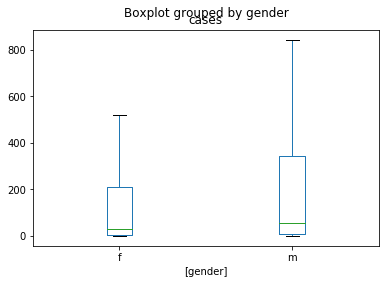

In [96]:
# Males seem to have a tendency for larges amount of tubercolosis cases
df_tidy_5.boxplot(column='cases', by=['gender'], grid=False, showfliers=False)

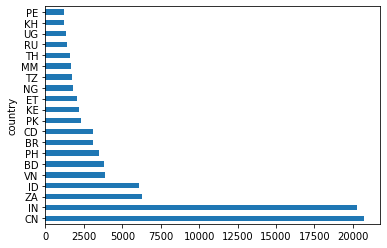

In [119]:
# Country also seems to have an affect on the number of cases
avg_cases_country = df_tidy_5.groupby('country').cases.mean().sort_values(ascending=False).head(20)
avg_cases_country.plot(kind='barh')

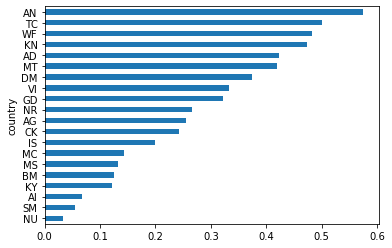

In [120]:
# Country also seems to have an affect on the number of cases
avg_cases_country = df_tidy_5.groupby('country').cases.mean().sort_values(ascending=True).head(20)
avg_cases_country.plot(kind='barh')

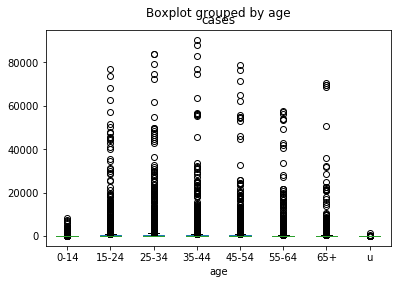

In [121]:
# Age has a smaller effect, but is considerably low in children
df_tidy_5.boxplot(column='cases', by='age', grid=False)

In [139]:
# No group seems to have a particular increase in number of null cases
df_tidy_5['null_case'] = df_tidy_5.cases.isnull().astype(int)
nulls = df_tidy_5.groupby(['country', 'year', 'gender', 'age']).null_case.sum()

nulls.sort_values(ascending=False).head(5)

country  year  gender  age  
LA       1992  m       u        1
IN       1991  f       55-64    1
         1990  m       u        1
         1991  f       0-14     1
                       15-24    1
Name: null_case, dtype: int64

In [140]:
# Assuming turberculosis' rate stays the same from 1980-2008, we could impute the mean per country, age group and gender
df_tidy_5.groupby(['country','age', 'gender']).cases.mean()

country  age    gender
AD       0-14   f           0.000000
                m           0.000000
         15-24  f           0.555556
                m           0.090909
         25-34  f           0.800000
                             ...    
ZW       55-64  m         320.857143
         65+    f         169.142857
                m         250.714286
         u      f           0.000000
                m           0.000000
Name: cases, Length: 3392, dtype: float64